In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [52]:
from google.colab import files
uploaded = files.upload()

Saving drug_consumption.csv to drug_consumption (1).csv


In [53]:
df = pd.read_csv('drug_consumption.csv', header=0, index_col=0)
print(df.head)

<bound method NDFrame.head of           Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                        
1     0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
2    -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
3     0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
4    -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
5     0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...       ...      ...        ...      ...        ...      ...      ...   
1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.1270

In [54]:
df['Alcohol'].head()

,Alcohol
ID,
1,CL5
2,CL5
3,CL6
4,CL4
5,CL4


<Axes: ylabel='ID'>

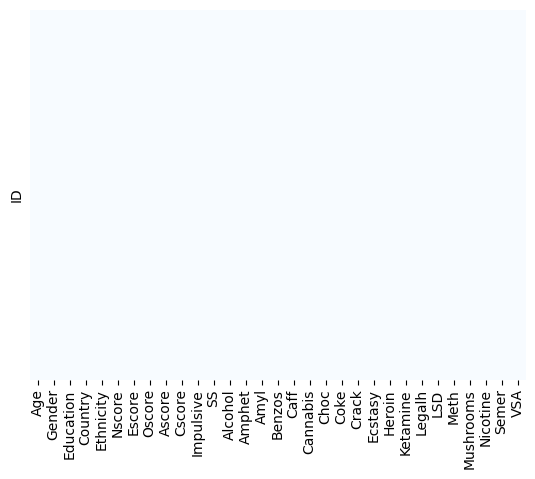

In [55]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [56]:
df.isnull().sum()

,0
Age,0
Gender,0
Education,0
Country,0
Ethnicity,0
Nscore,0
Escore,0
Oscore,0
Ascore,0
Cscore,0


In [57]:
print(df.duplicated().sum())

0


In [58]:
n = len(df.columns)
n

31

In [59]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [60]:
mapping = {'CL0': 1, 'CL1': 2, 'CL2': 3, 'CL3': 4, 'CL4': 5, 'CL5': 6,'CL6': 7}
df['Alcohol'] = df['Alcohol'].map(mapping)
df['Amphet'] = df['Amphet'].map(mapping)
df['Amyl'] = df['Amyl'].map(mapping)
df['Benzos'] = df['Benzos'].map(mapping)
df['Caff'] = df['Caff'].map(mapping)
df['Cannabis'] = df['Cannabis'].map(mapping)
df['Choc'] = df['Choc'].map(mapping)
df['Coke'] = df['Coke'].map(mapping)
df['Crack'] = df['Crack'].map(mapping)
df['Ecstasy'] = df['Ecstasy'].map(mapping)
df['Heroin'] = df['Heroin'].map(mapping)
df['Ketamine'] = df['Ketamine'].map(mapping)
df['Legalh'] = df['Legalh'].map(mapping)
df['LSD'] = df['LSD'].map(mapping)
df['Meth'] = df['Meth'].map(mapping)
df['Mushrooms'] = df['Mushrooms'].map(mapping)
df['Nicotine'] = df['Nicotine'].map(mapping)
df['Semer'] = df['Semer'].map(mapping)
df['VSA'] = df['VSA'].map(mapping)

In [61]:
df['Alcohol'].head()

,Alcohol
ID,
1,6
2,6
3,7
4,5
5,5


/tmp/ipython-input-2194541131.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
/tmp/ipython-input-2194541131.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color": "b

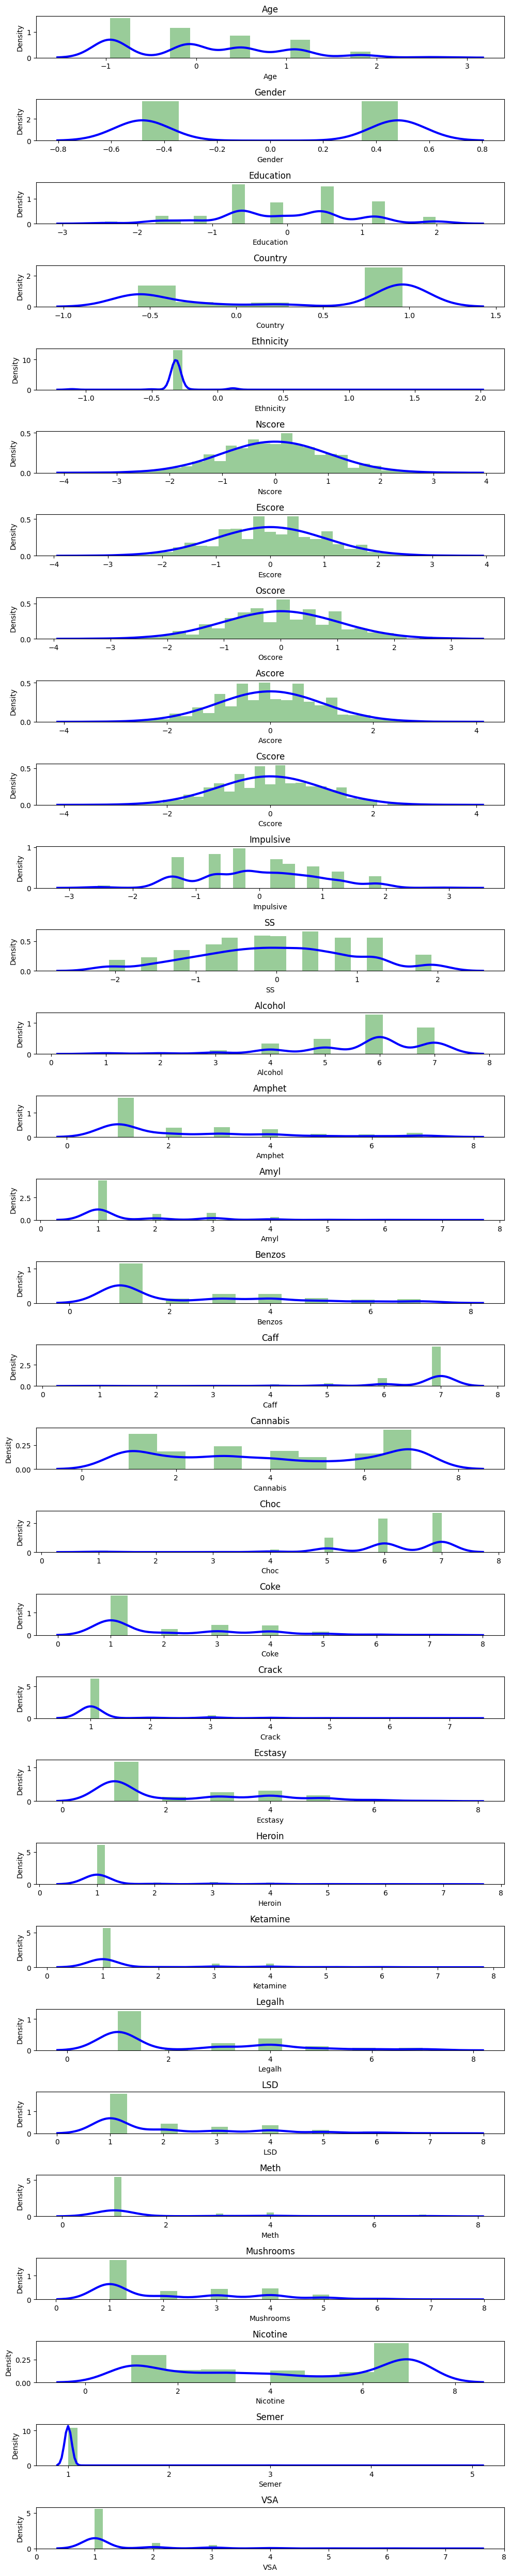

In [62]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(31, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

In [63]:

correlations = df.corr()

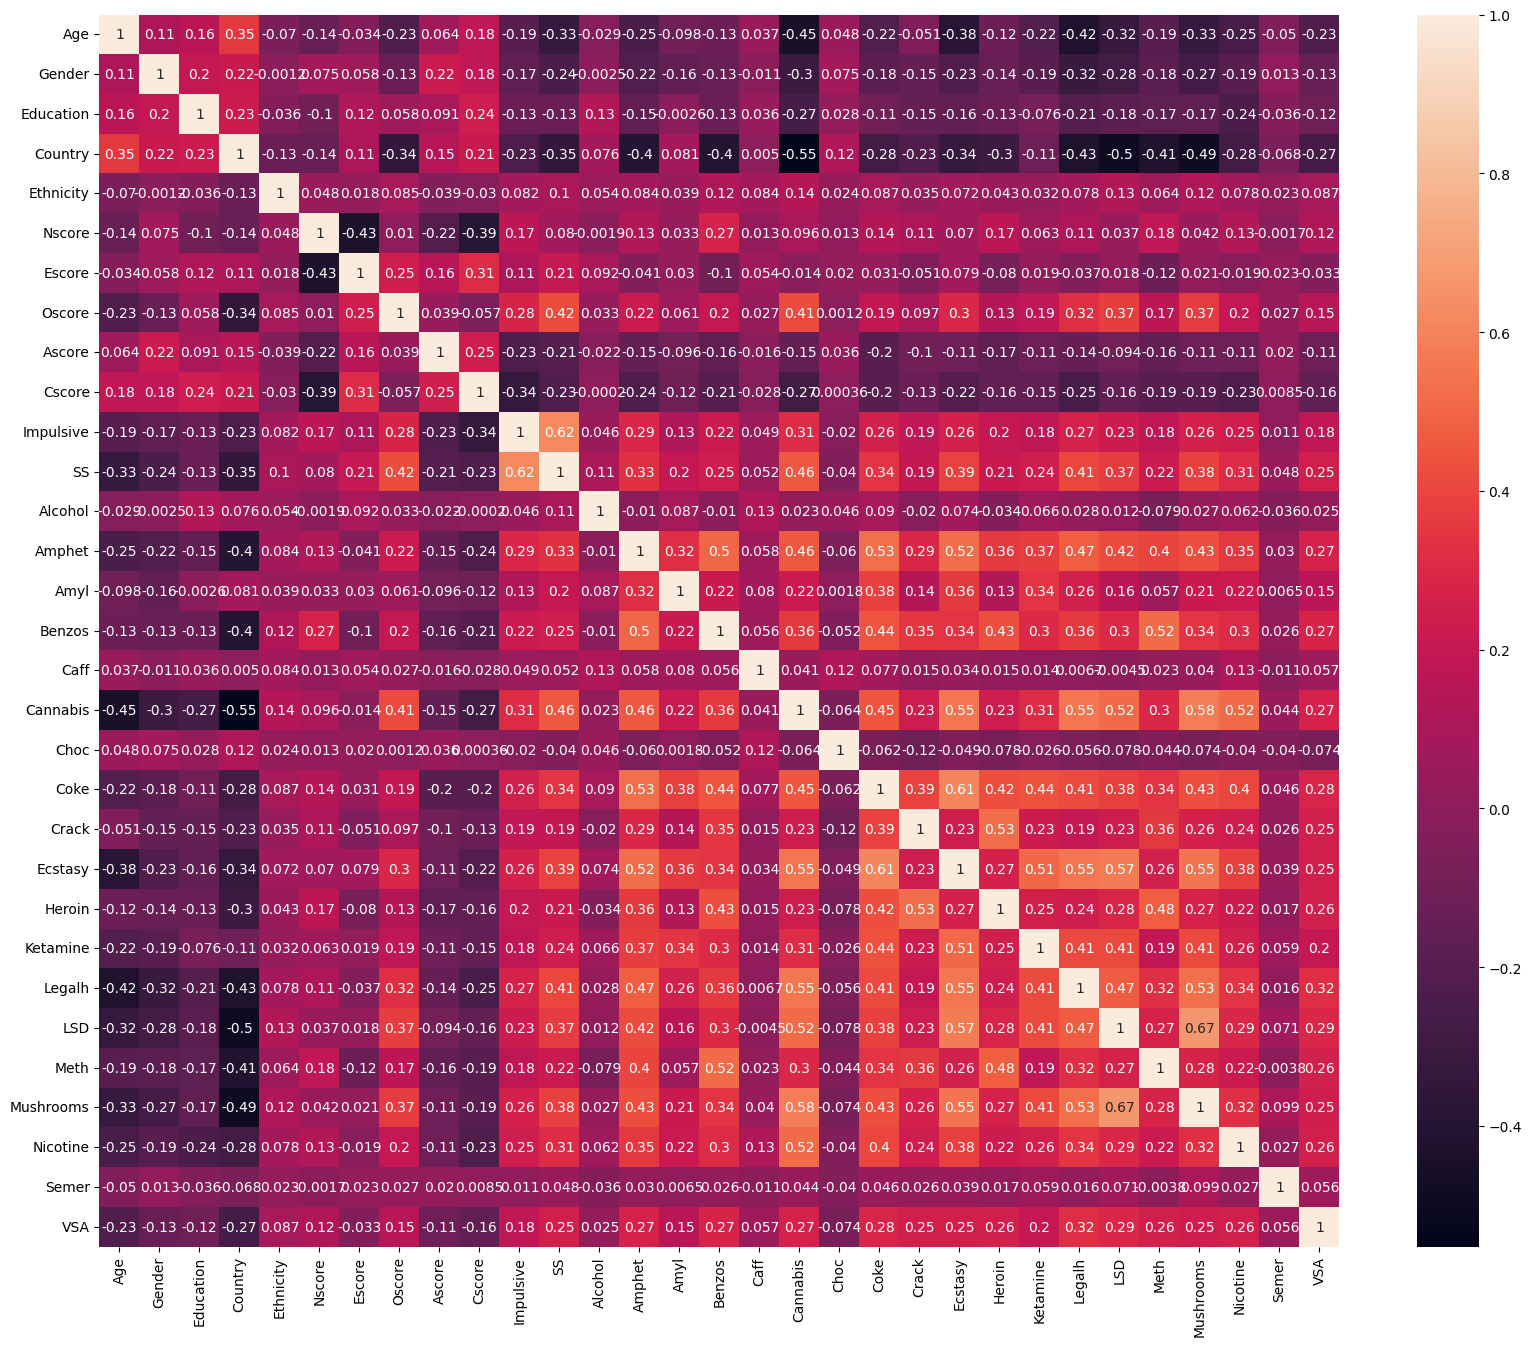

In [64]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlations, annot = True)
plt.show()

In [65]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [66]:
df_scaled.shape

(1885, 31)

In [67]:
# Fit once and keep labels
#n_clusters = 4  # Reduced from 11 for better penguin grouping
#kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#labels = kmeans.fit_predict(df_scaled)

In [68]:

#kmeans.cluster_centers_.shape

In [69]:

#cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
#cluster_centers

In [70]:
#cluster_centers = scaler.inverse_transform(cluster_centers)
#cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
#cluster_centers

In [71]:

#labels.max()

In [72]:

#labels.min()

In [73]:

#y_kmeans = kmeans.fit_predict(df_scaled)
#y_kmeans

In [74]:
#df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
#df_cluster.head()

In [75]:
#for i in df.columns:
  #plt.figure(figsize = (35, 5))
  #for j in range(7):
    #plt.subplot(1,7,j+1)
    #cluster = df_cluster[df_cluster['cluster'] == j]
    #cluster[i].hist(bins = 20)
    #plt.title('{}    \nCluster {} '.format(i,j))

  #plt.show()

In [76]:
#pca = PCA(n_components=2)
#principal_comp = pca.fit_transform(df_scaled)
#principal_comp

In [77]:
#pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
#pca_df.head()

In [78]:
#pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
#pca_df.head()

In [79]:
#plt.figure(figsize=(10,10))
#ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
#plt.show()

In [80]:
 !pip install kneed

In [81]:
#from kneed import KneeLocator

# 1. Use the inertia list and k_range you already calculated
#kn = KneeLocator(
    #k_range,
    #inertia,
    #curve='convex',
    #direction='decreasing'
#)

# 2. Extract the optimal K automatically
#optimal_k = kn.knee

#print(f"The mathematical optimal number of clusters is: {optimal_k}")

# 3. Proceed with K-Means using the automated value
#kmeans = KMeans(n_clusters=optimal_k, random_state=42)
#kmeans.fit(data_pca)

In [82]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

# 1. Determine the range of clusters you want to test
K = range(1, 11)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

In [83]:
kl = KneeLocator(K, inertia, curve="convex", direction="decreasing")
optimal_k = kl.elbow

print(f"The optimal number of clusters is: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(df_scaled)

The optimal number of clusters is: 4


In [84]:
# Transform back to original units before making the DataFrame
raw_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(data=raw_centers, columns=df.columns)

In [85]:
#Create the results dataframe properly
df_cluster = df.copy()
df_cluster['cluster'] = labels

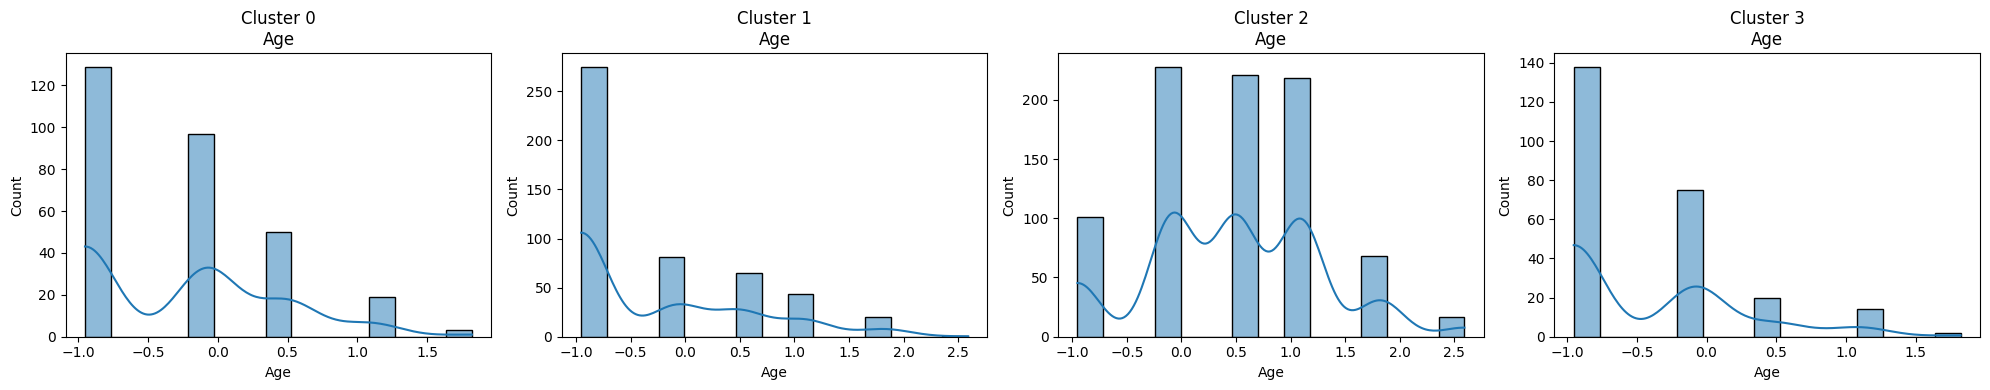

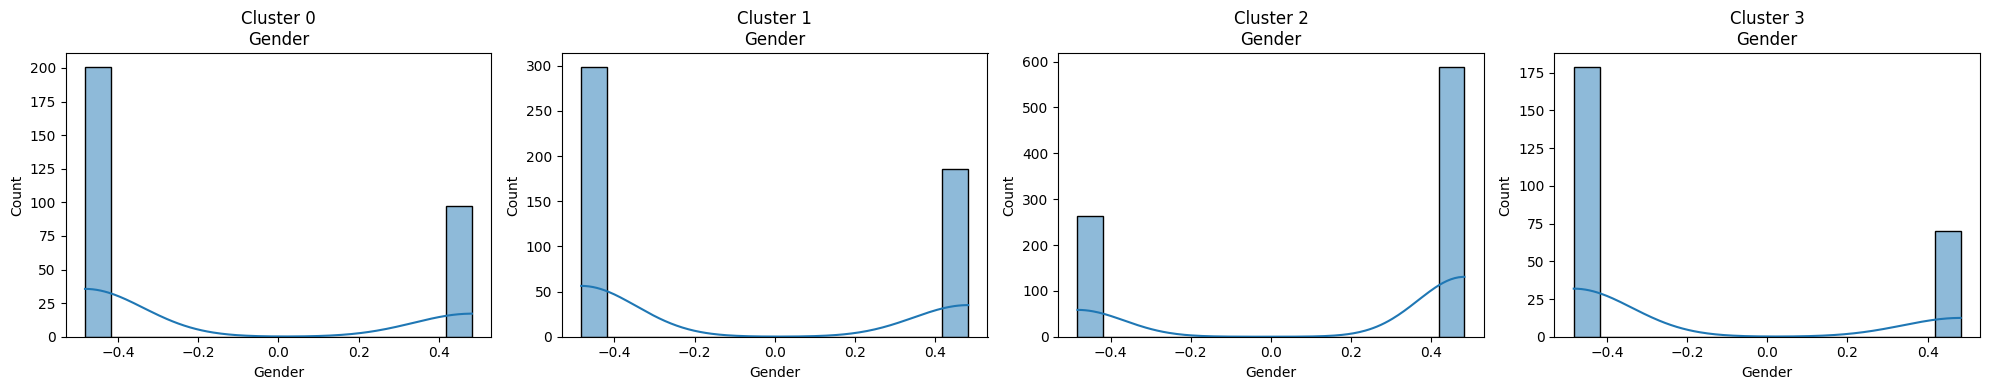

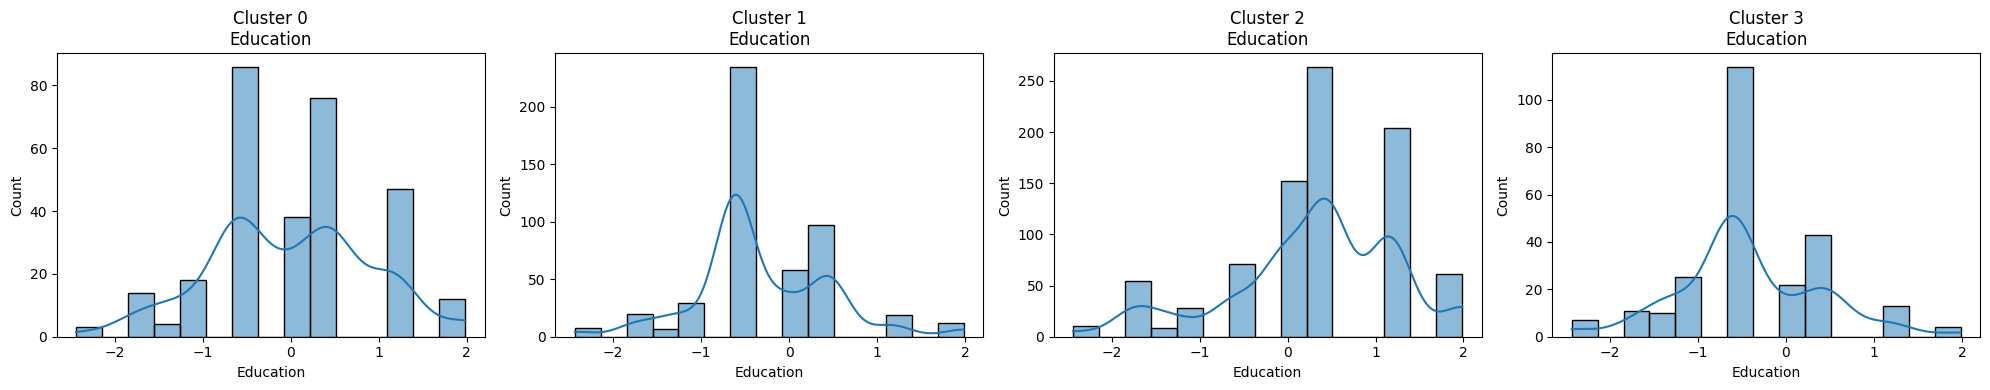

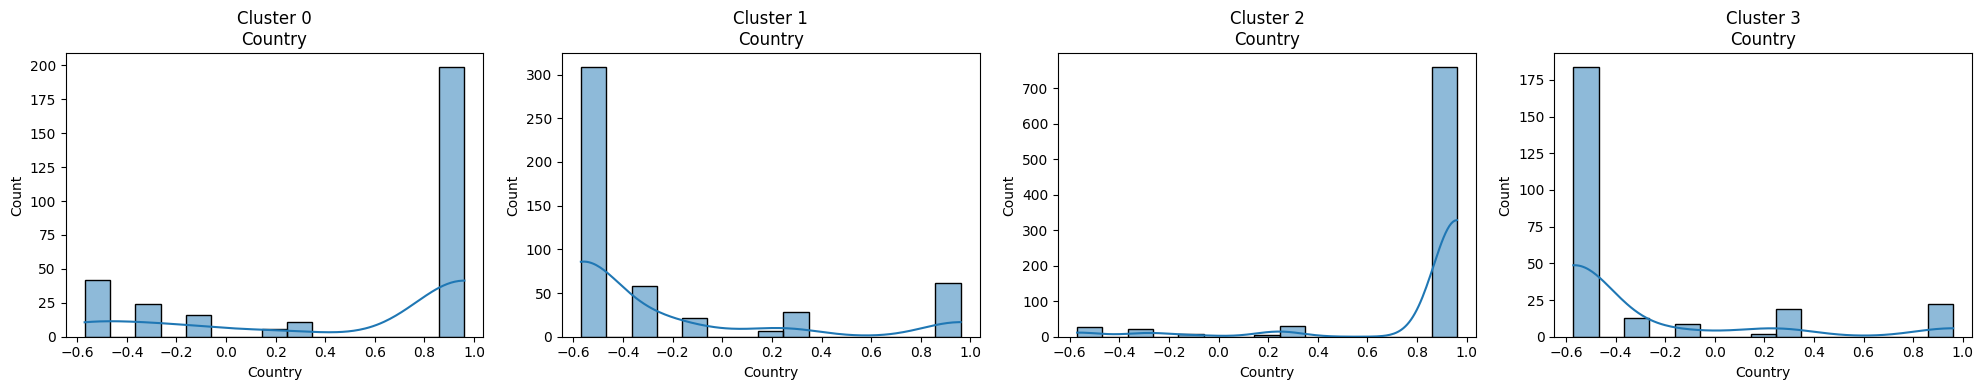

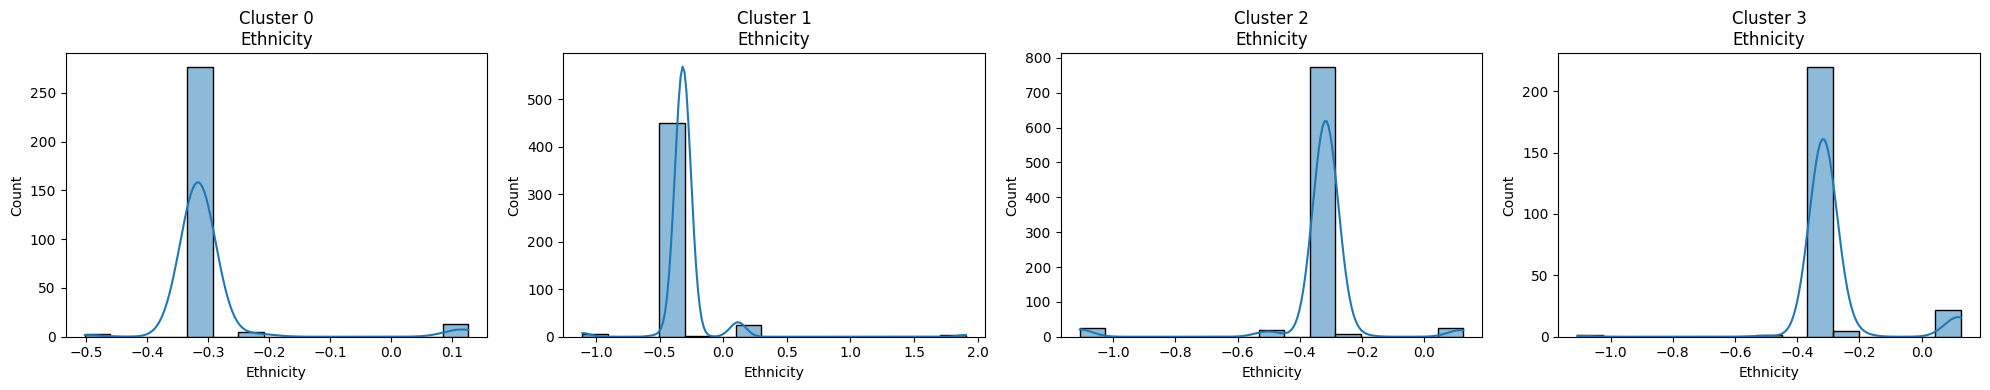

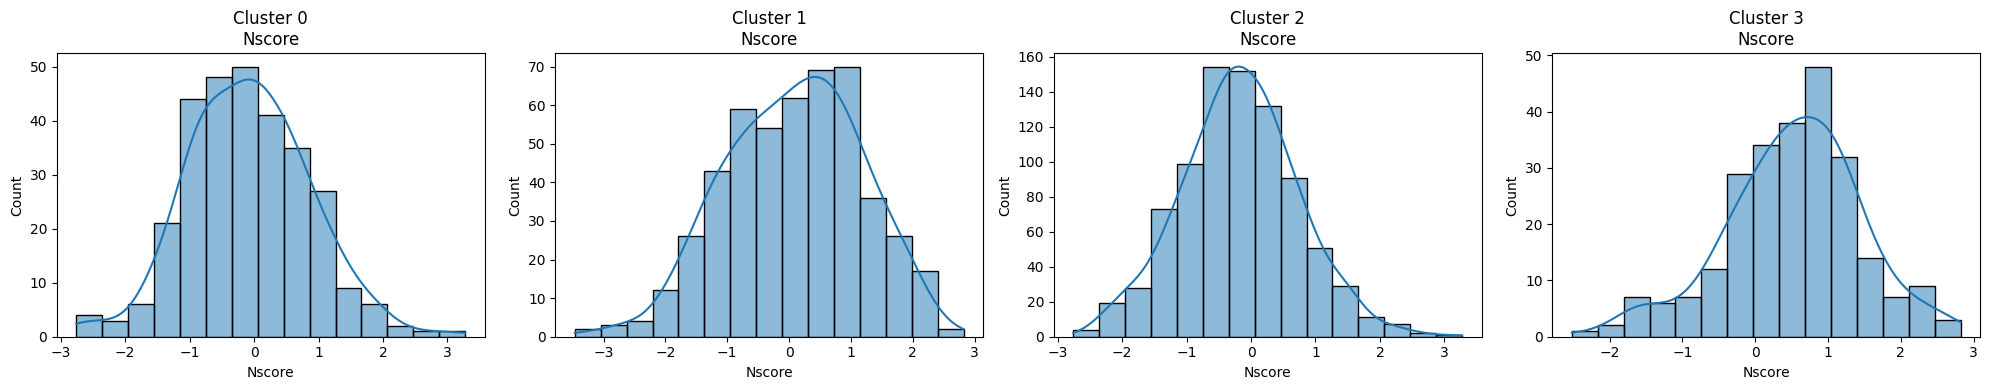

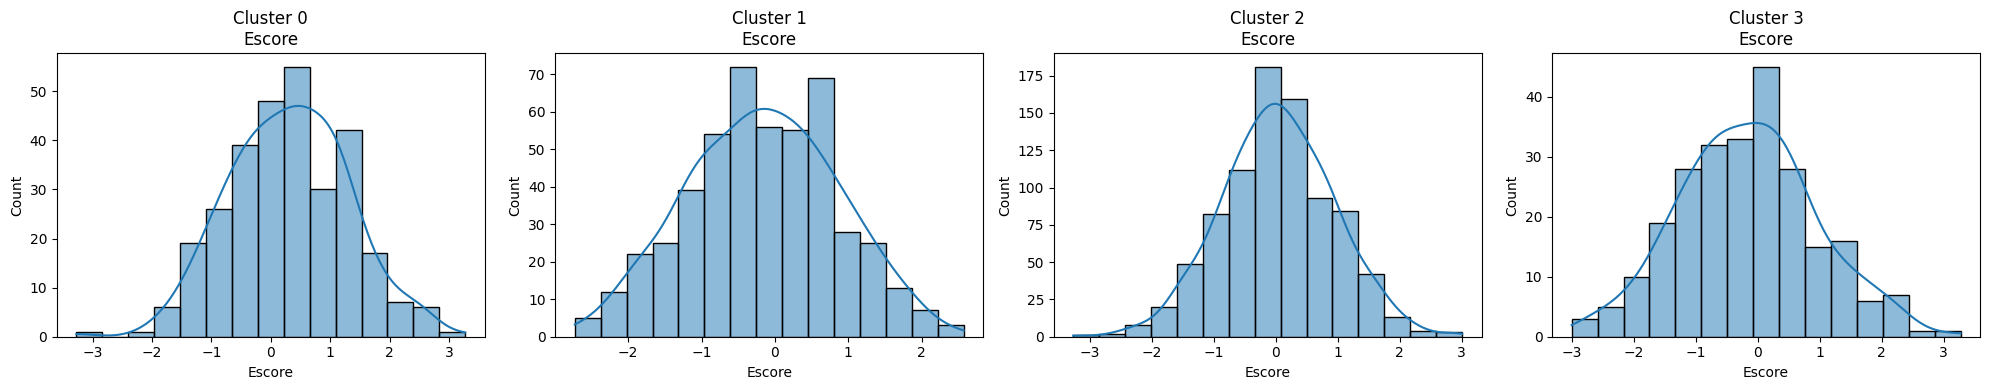

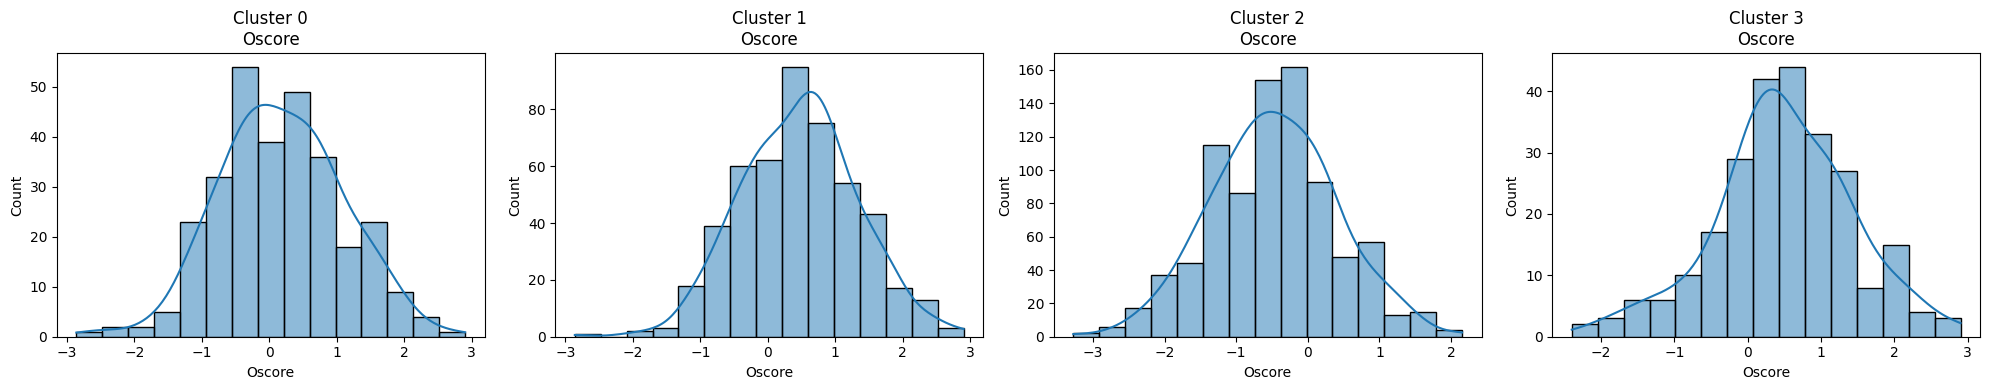

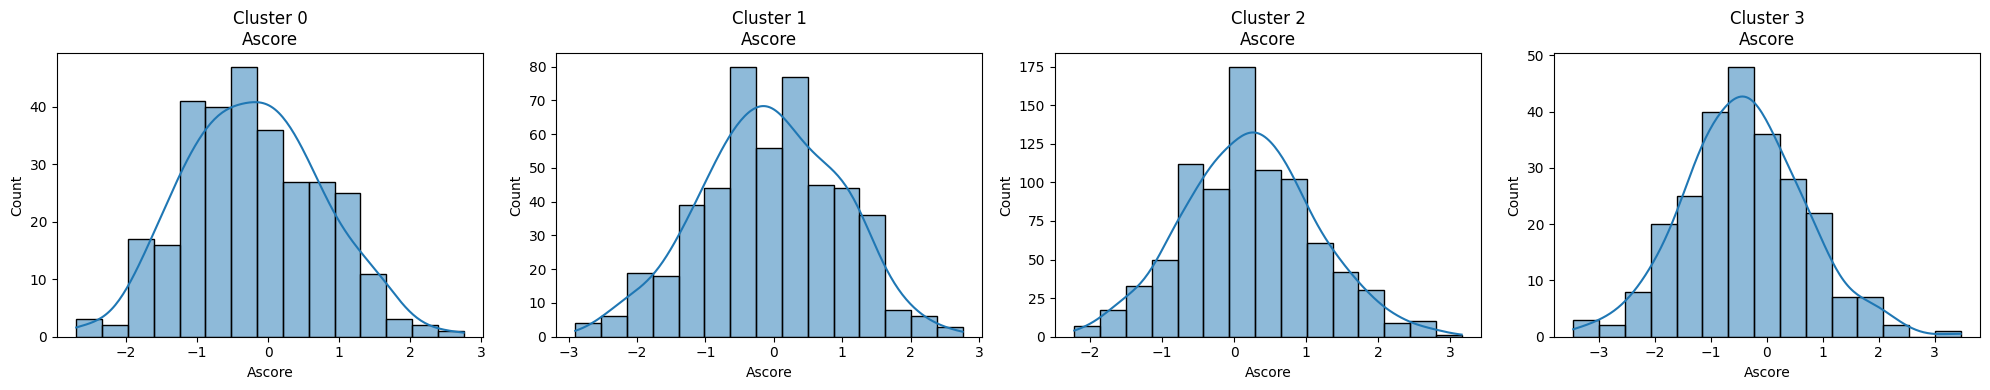

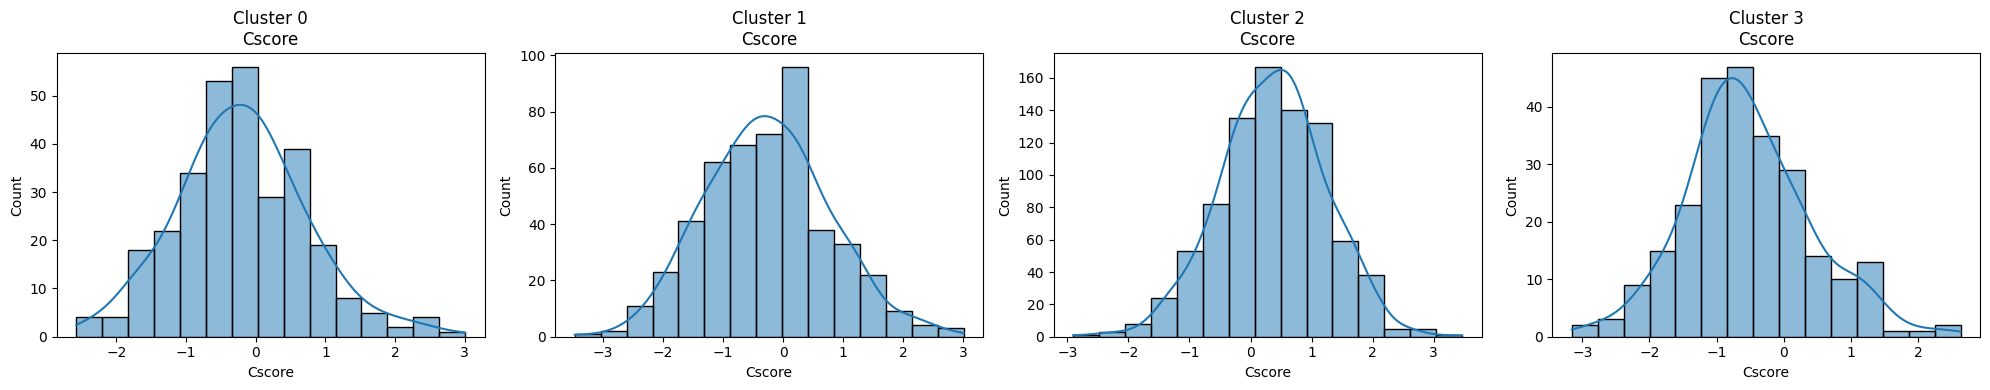

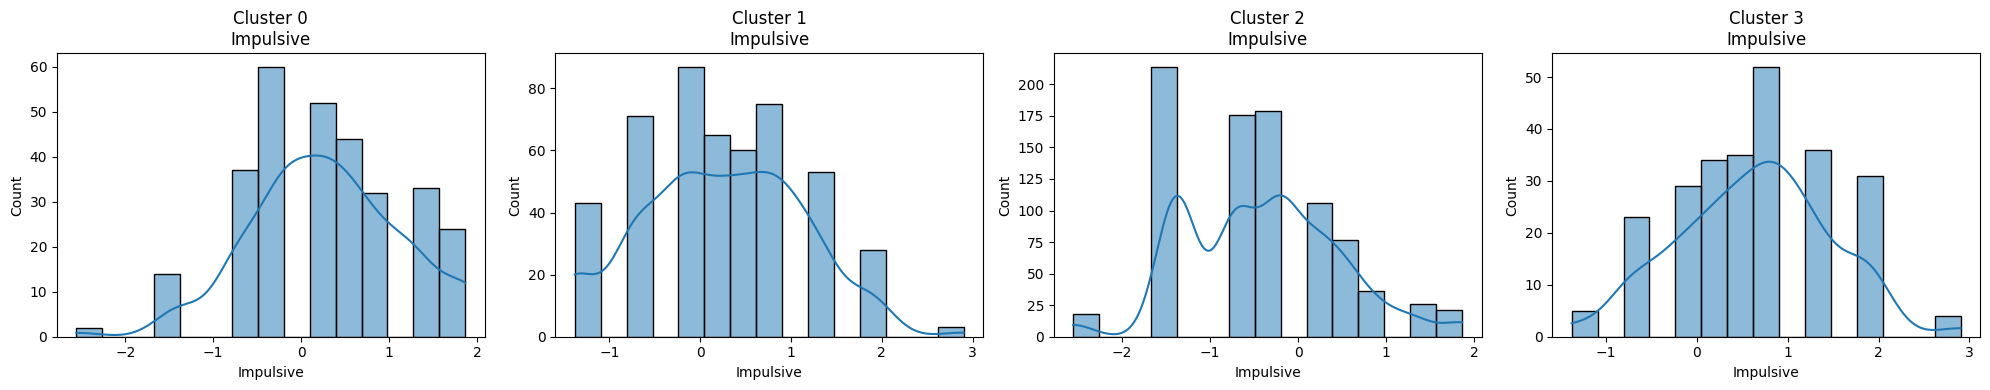

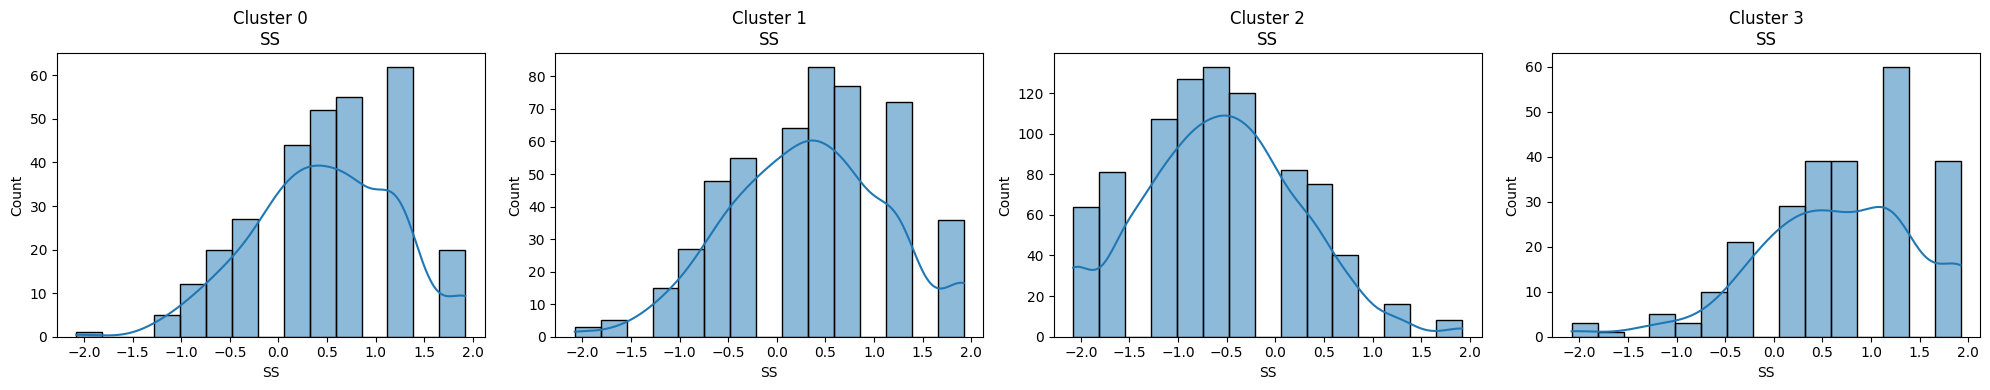

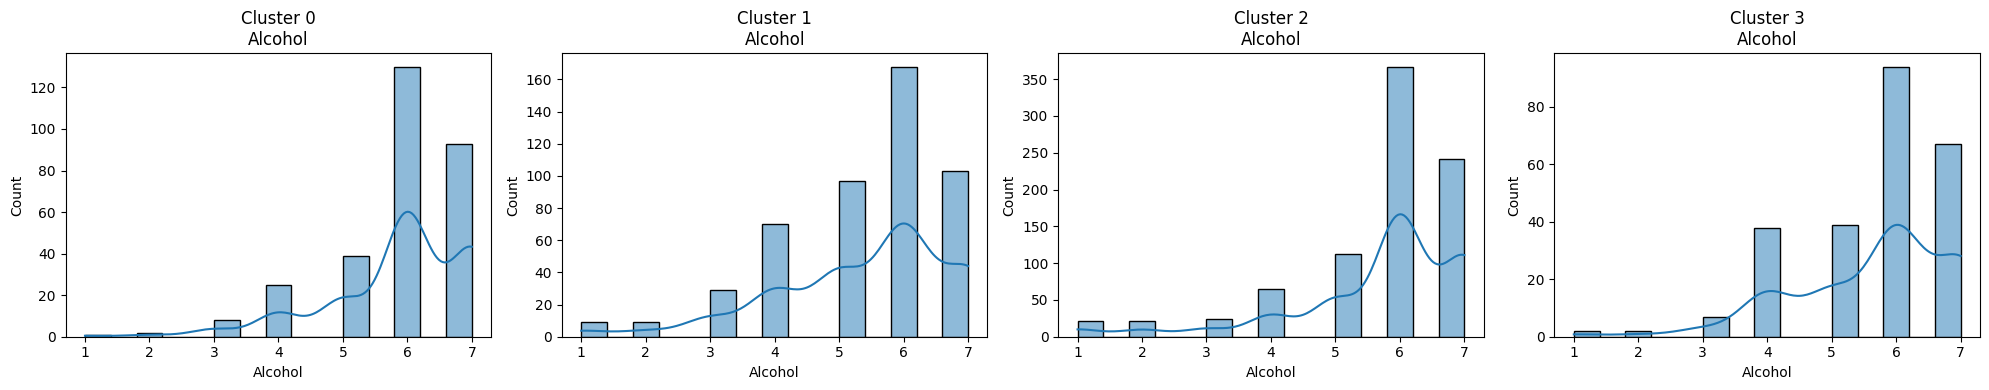

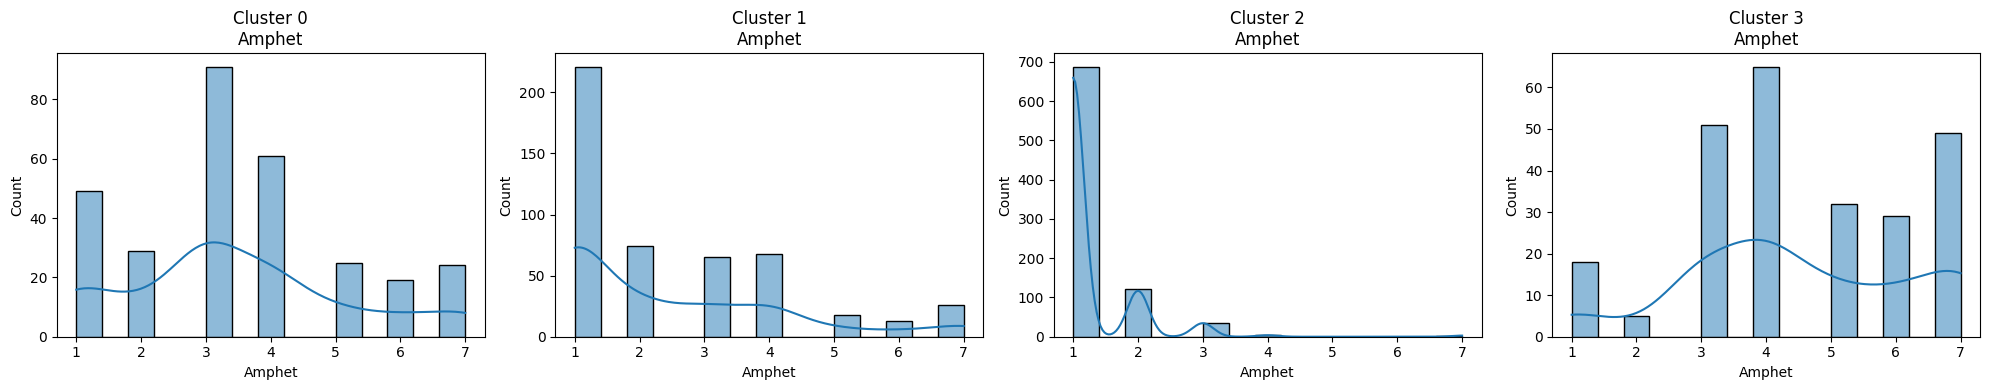

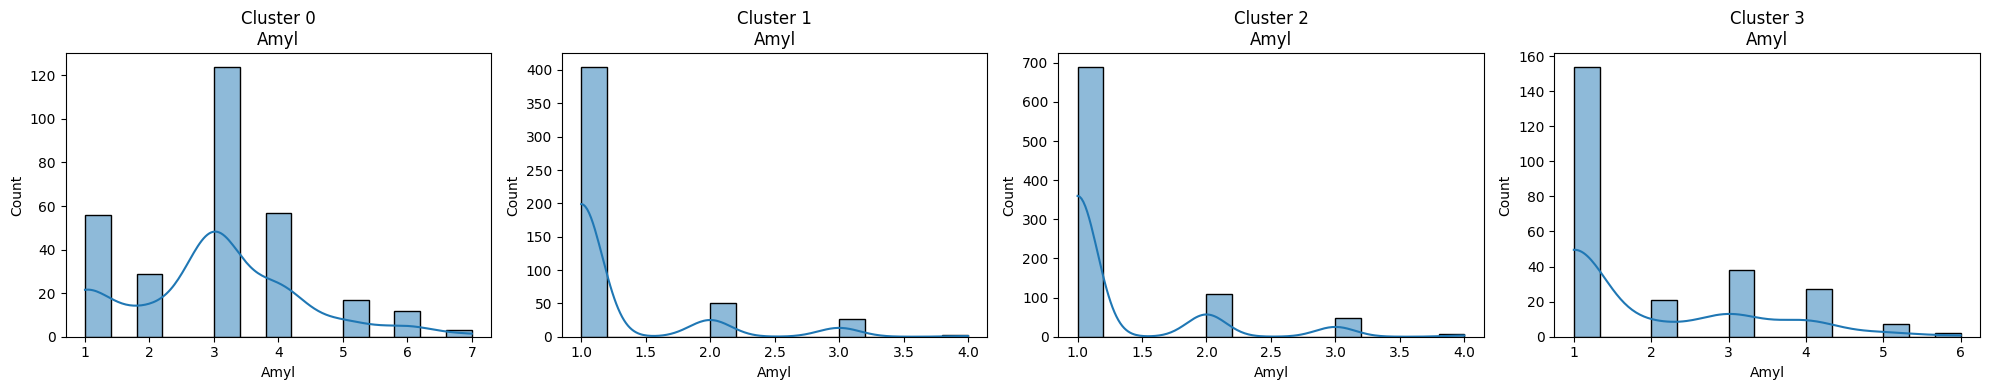

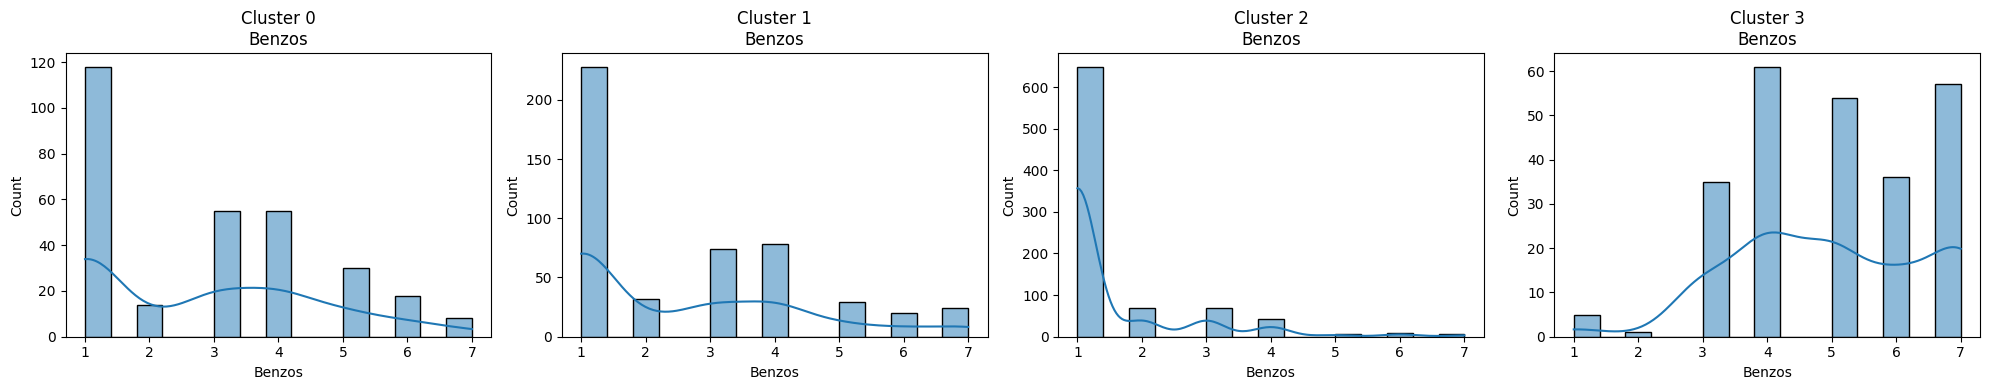

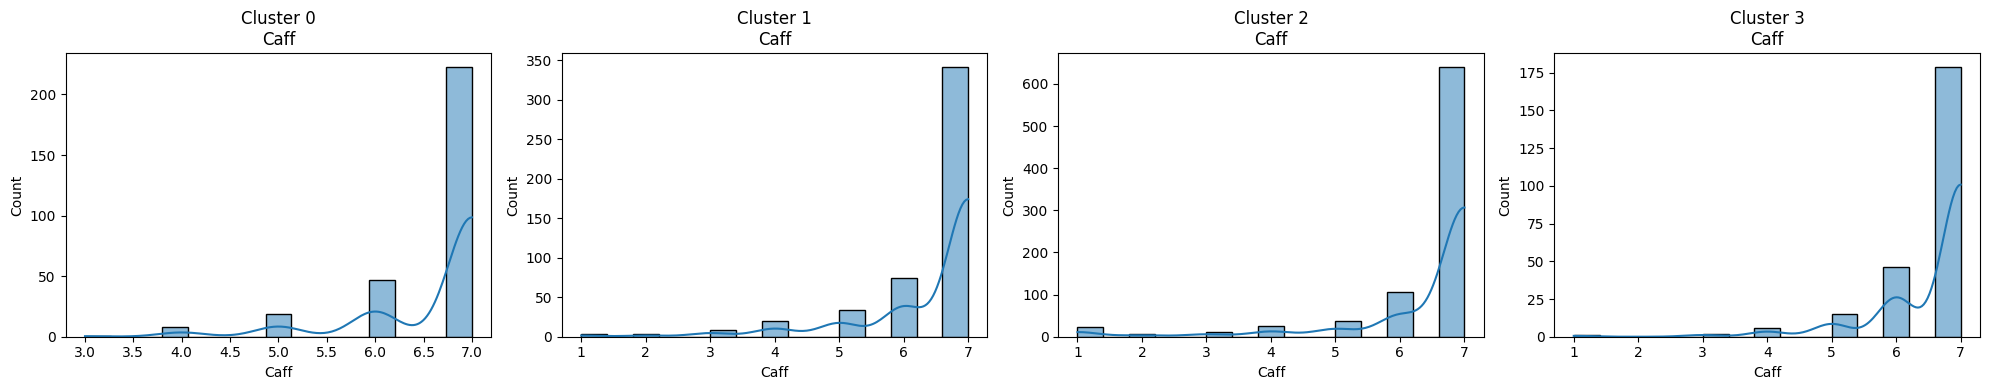

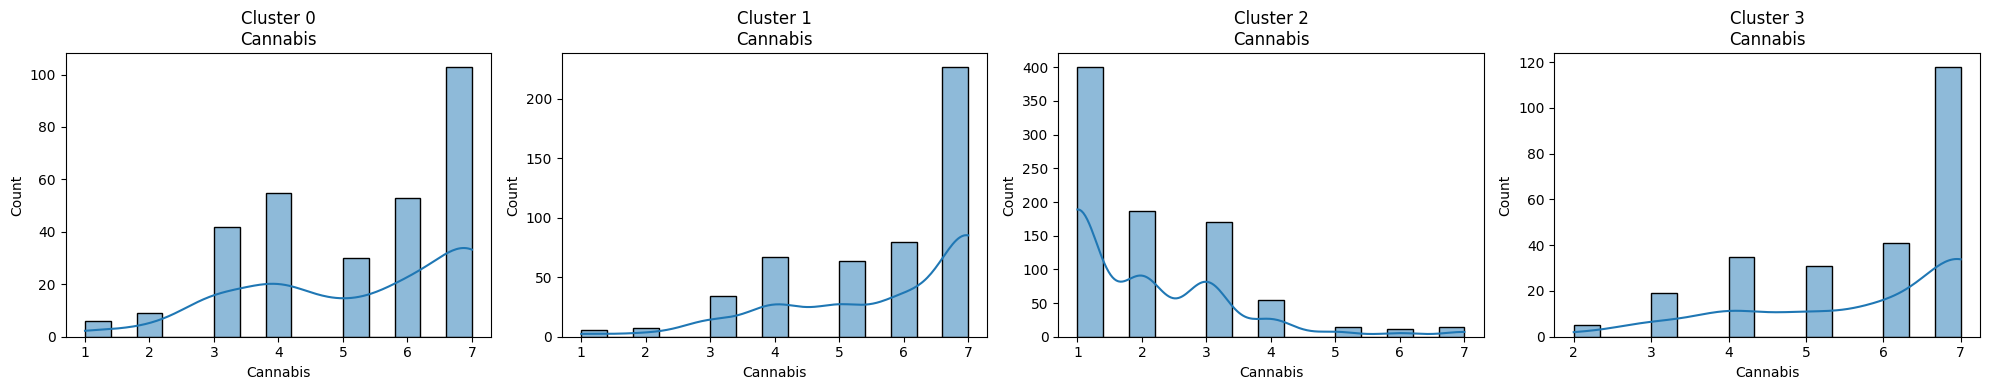

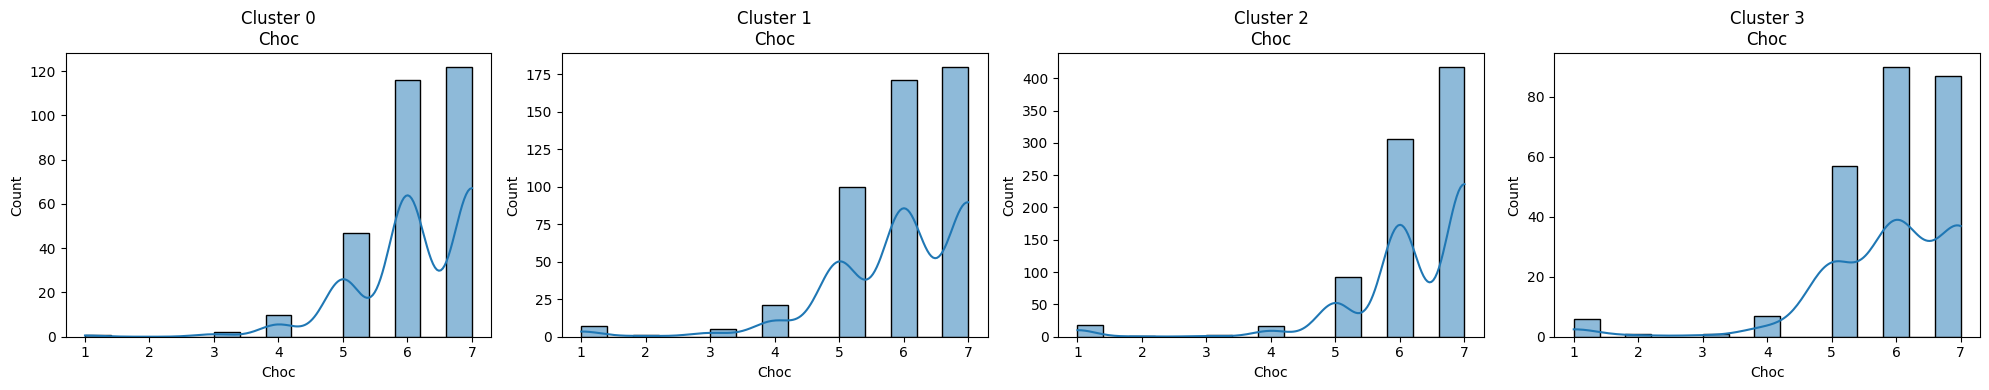

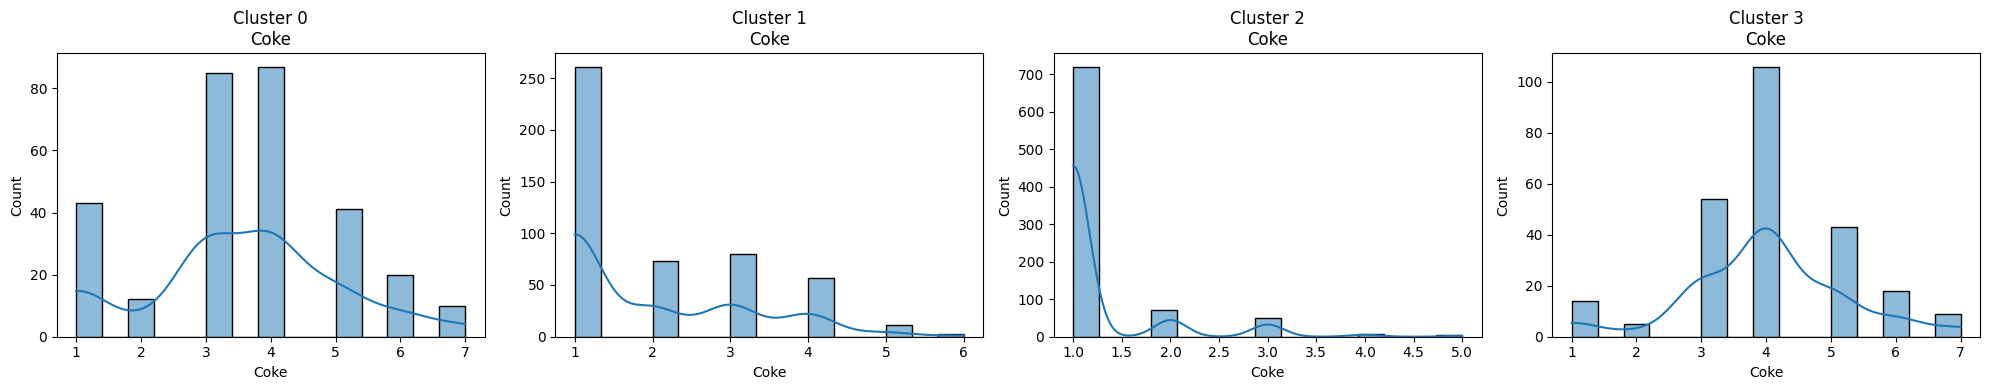

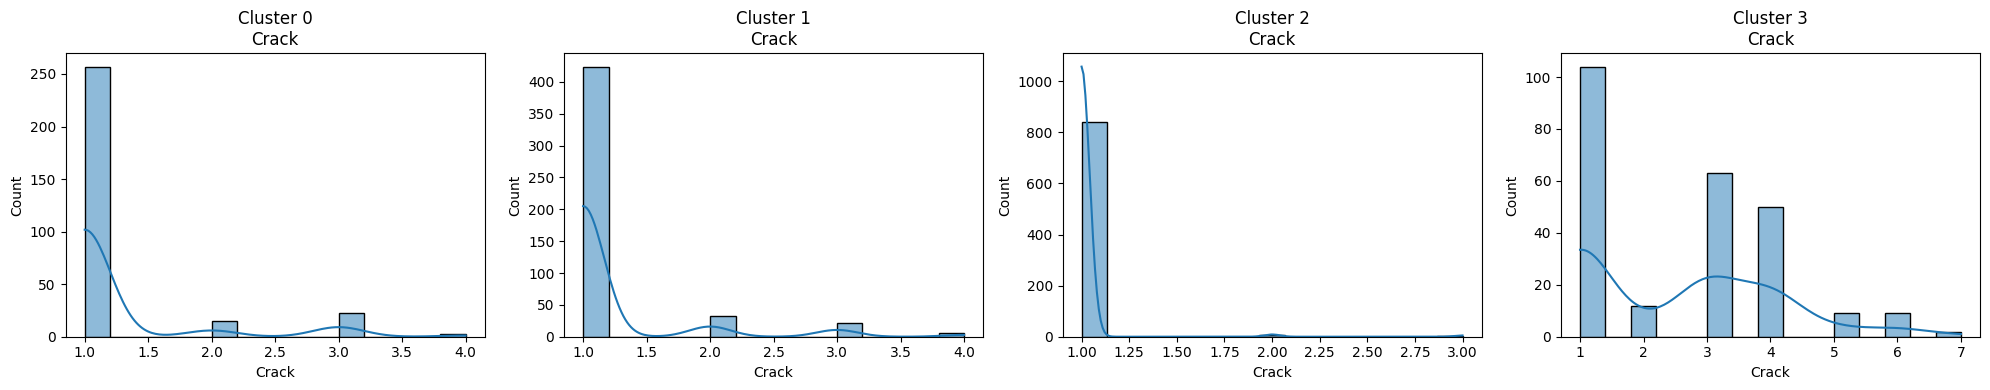

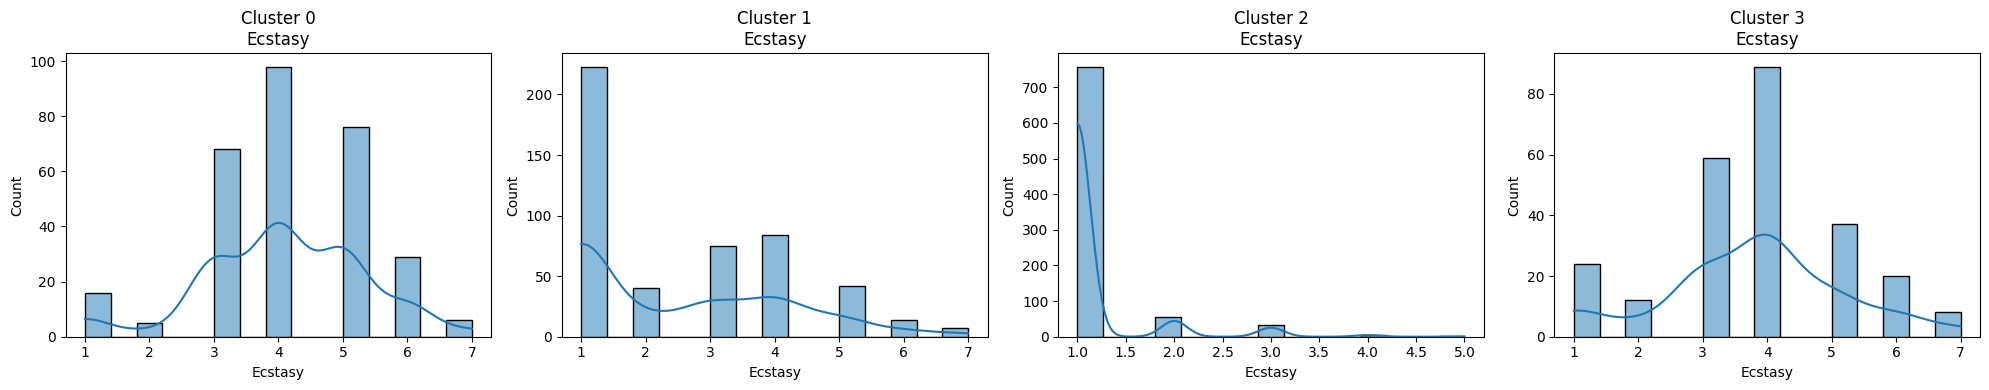

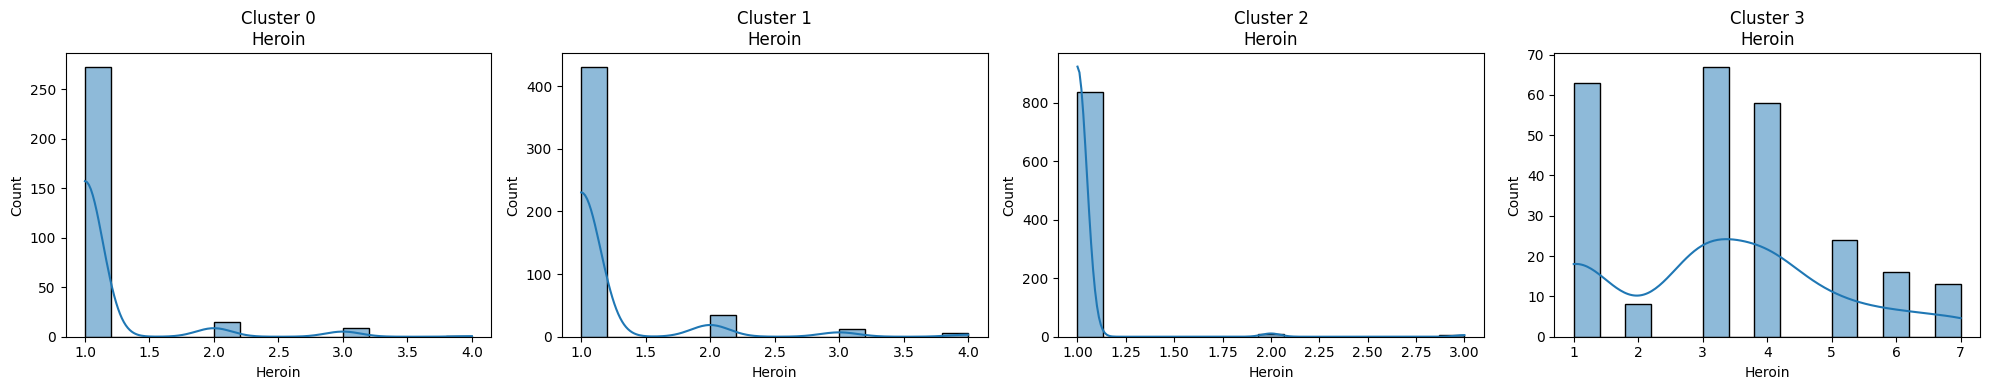

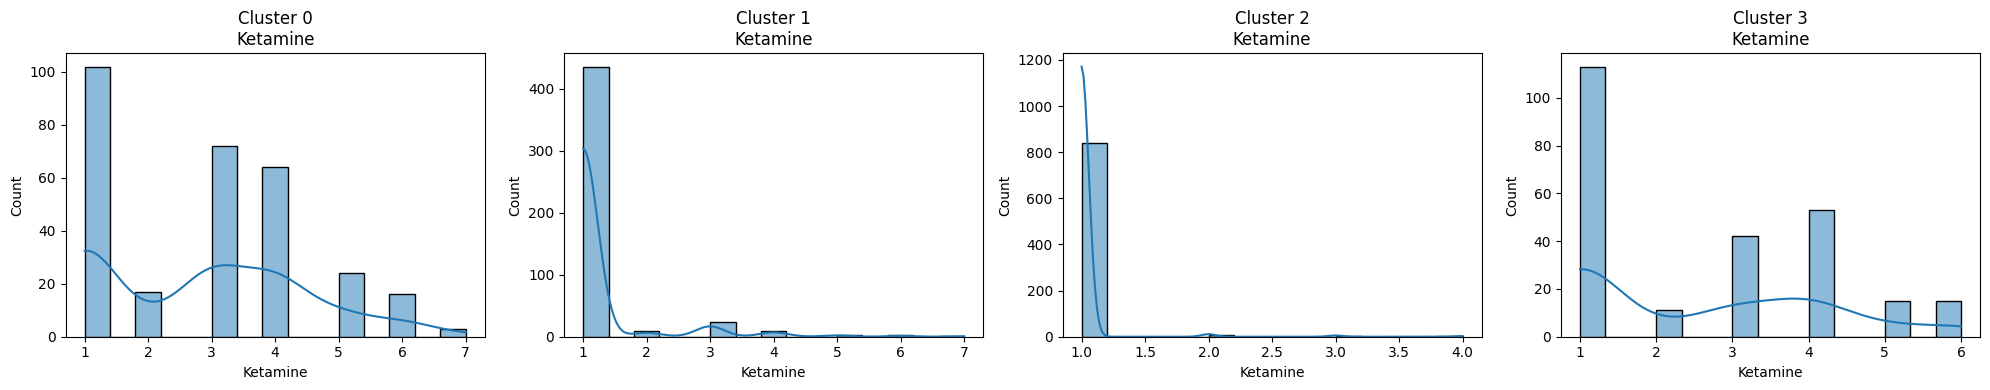

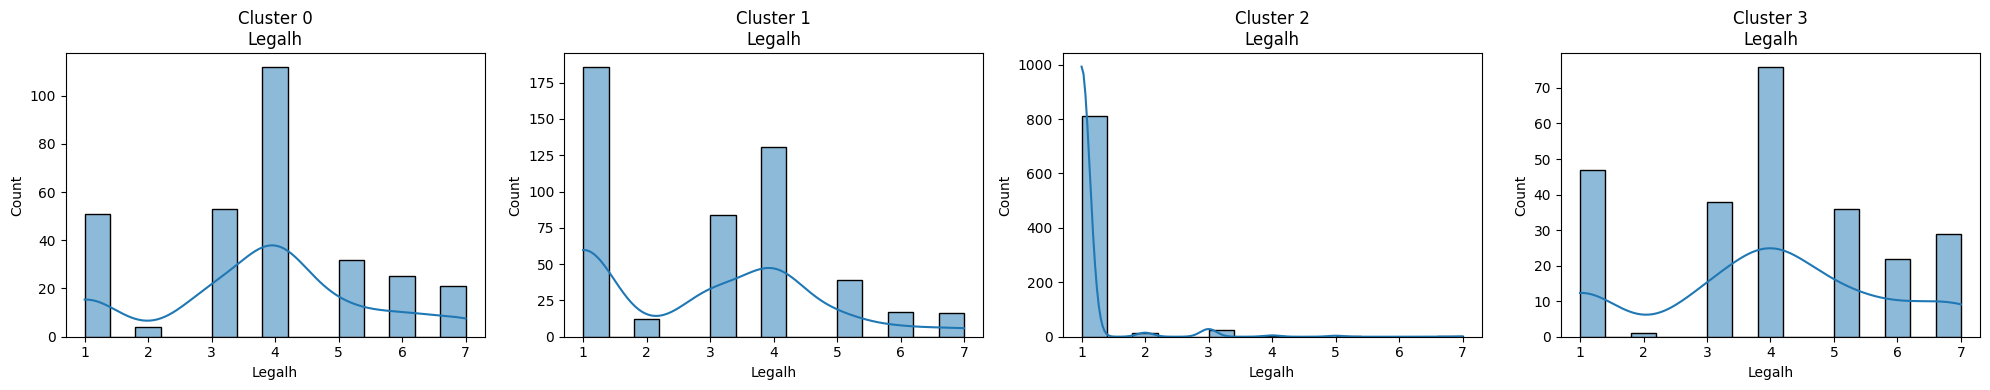

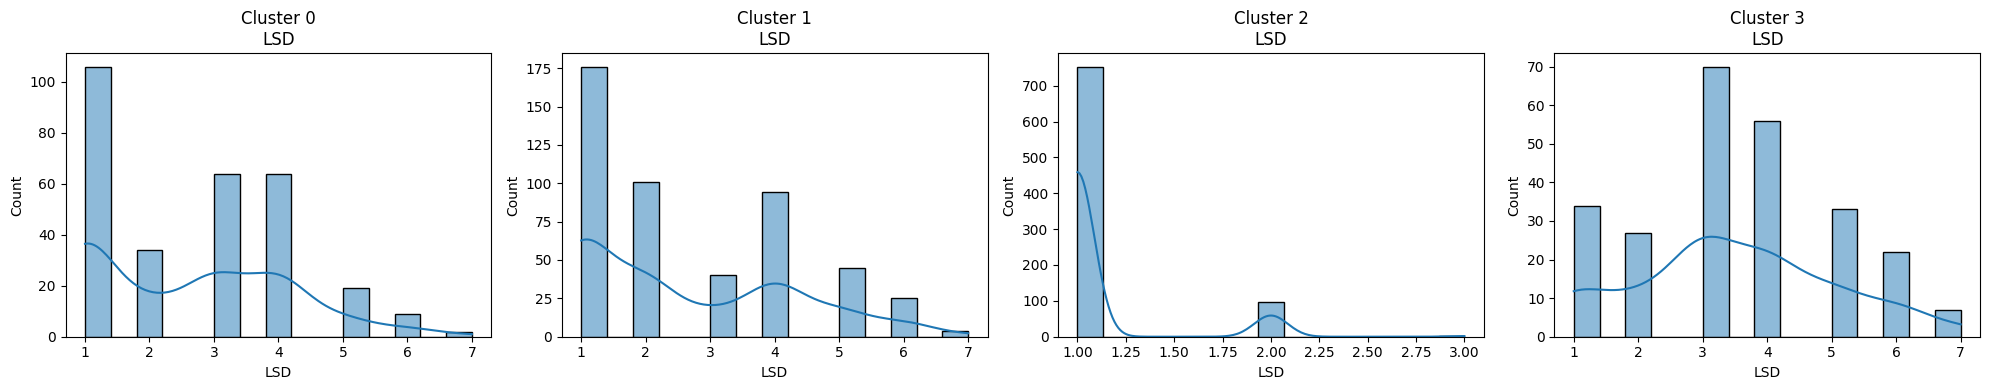

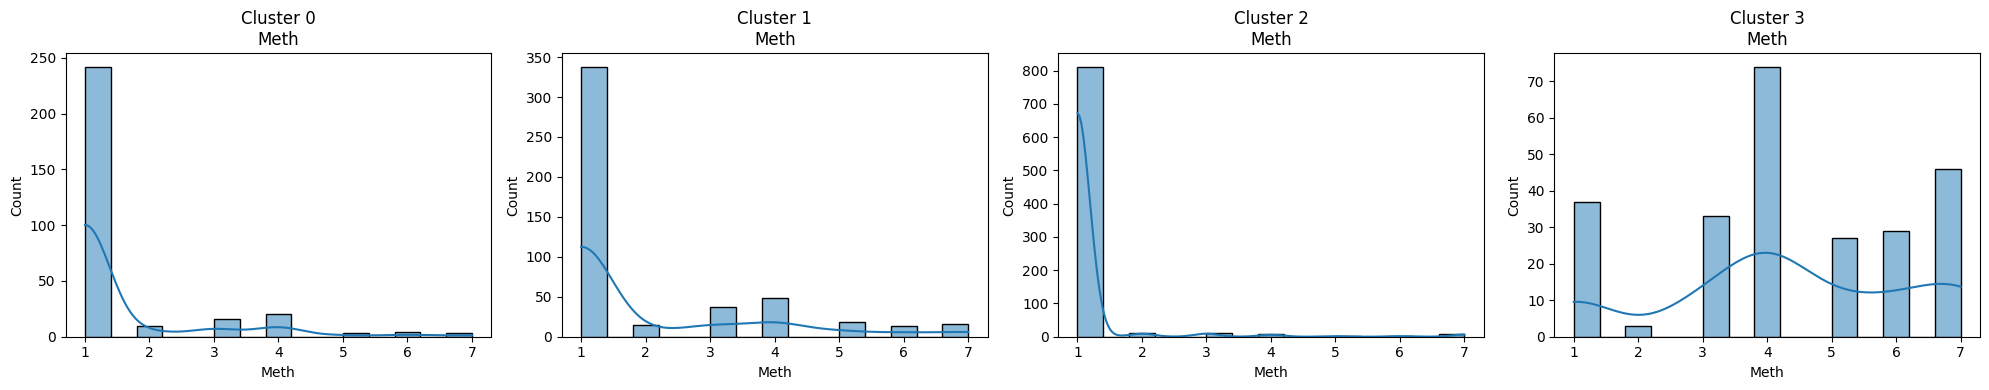

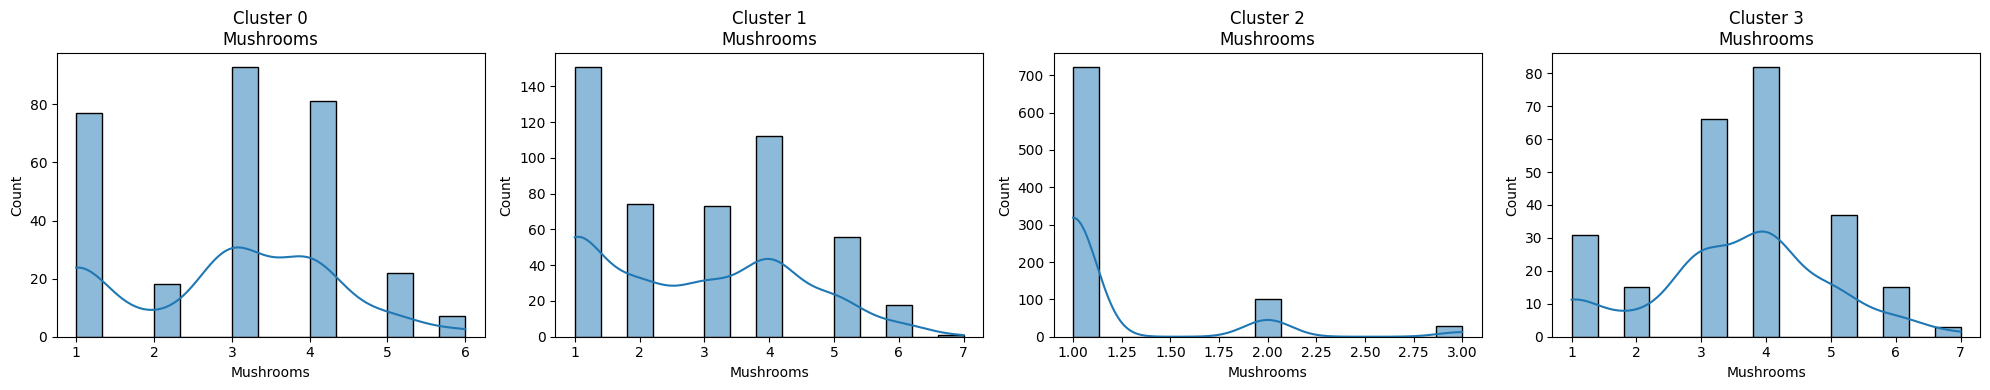

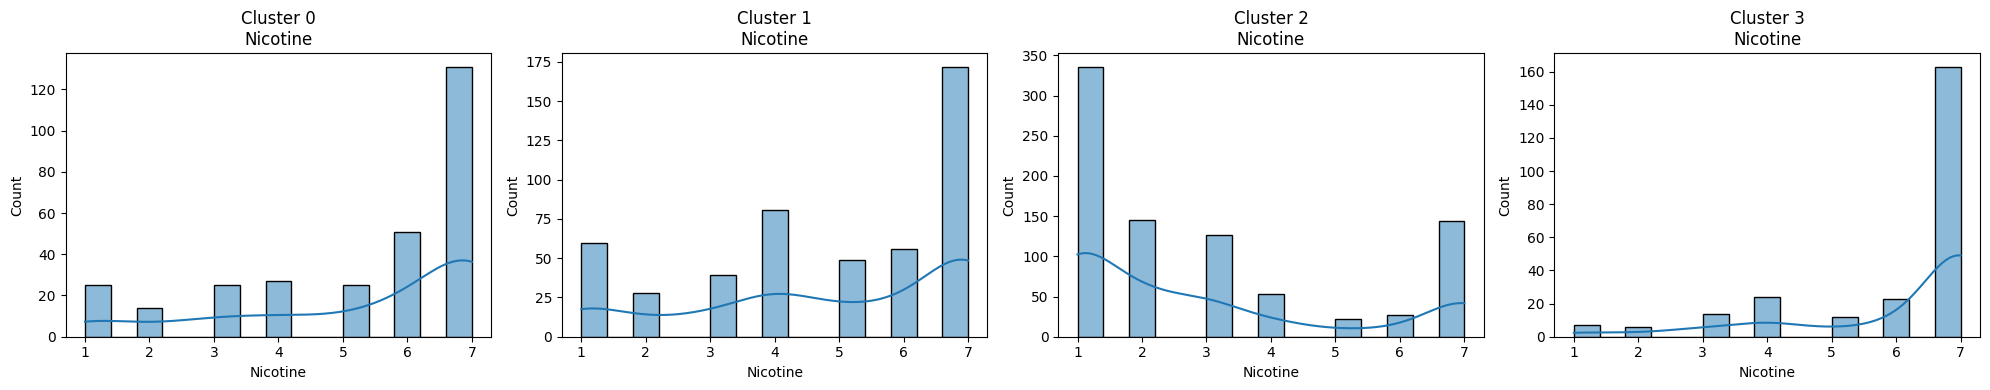

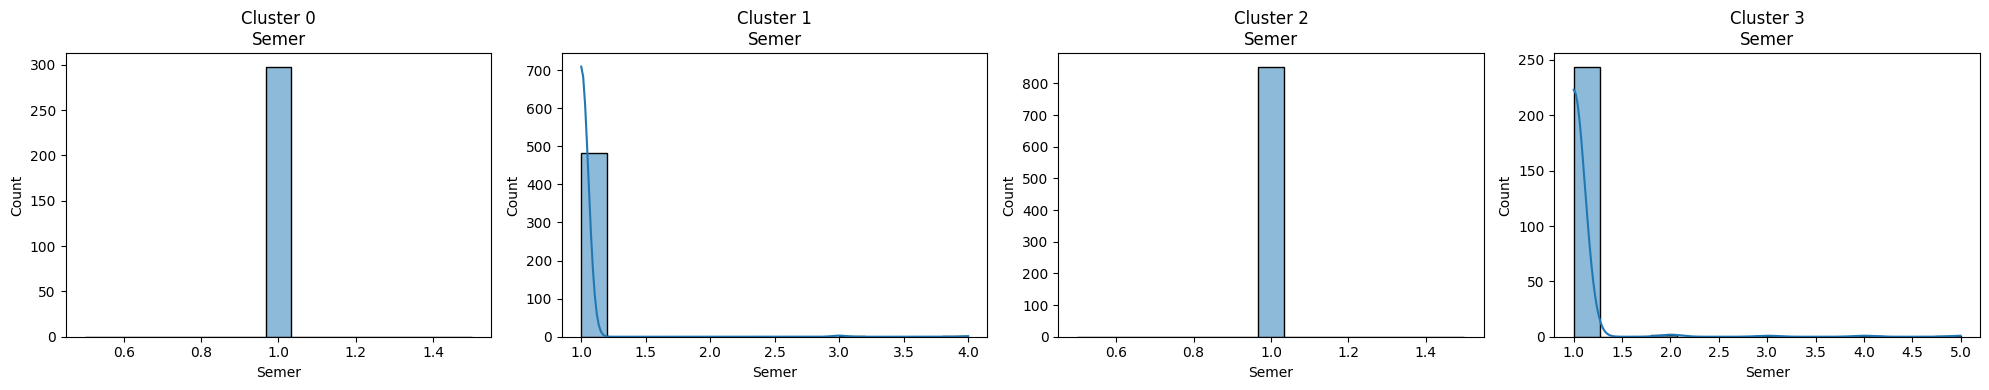

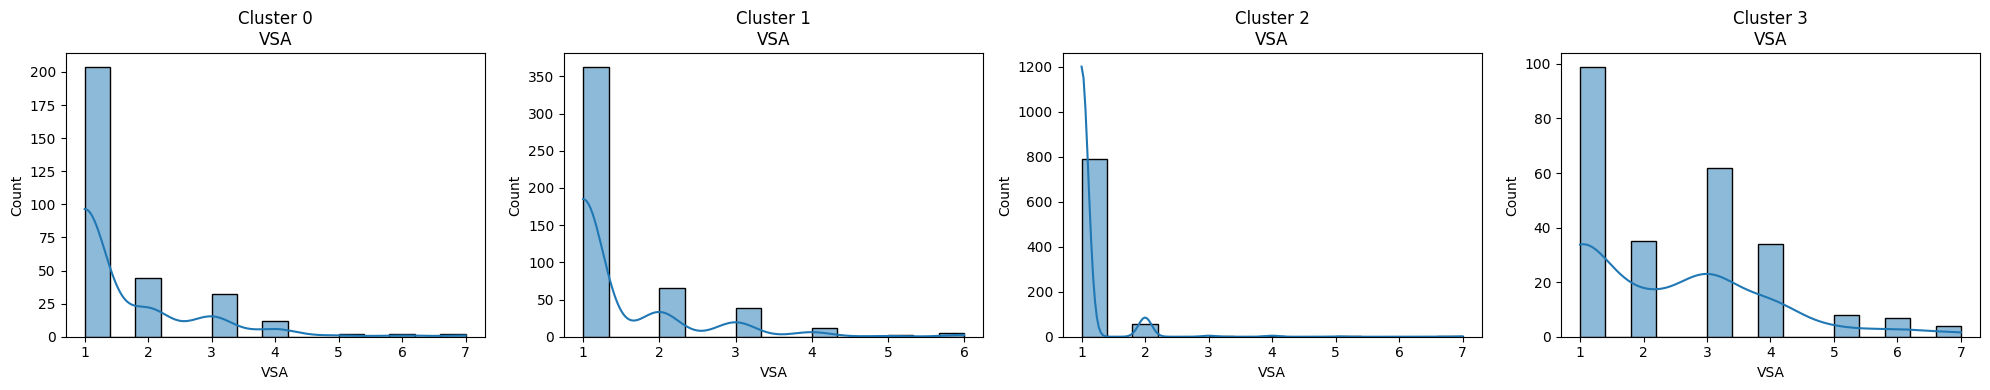

In [86]:
#Improved Visualization Loop (Dynamic)
for i in df.columns:
    plt.figure(figsize=(5 * optimal_k, 4))
    for j in range(optimal_k):
        plt.subplot(1, optimal_k, j+1)
        cluster_data = df_cluster[df_cluster['cluster'] == j]
        sns.histplot(cluster_data[i], bins=15, kde=True) # kde adds a nice trend line
        plt.title(f'Cluster {j}\n{i}')
    plt.tight_layout()
    plt.show()

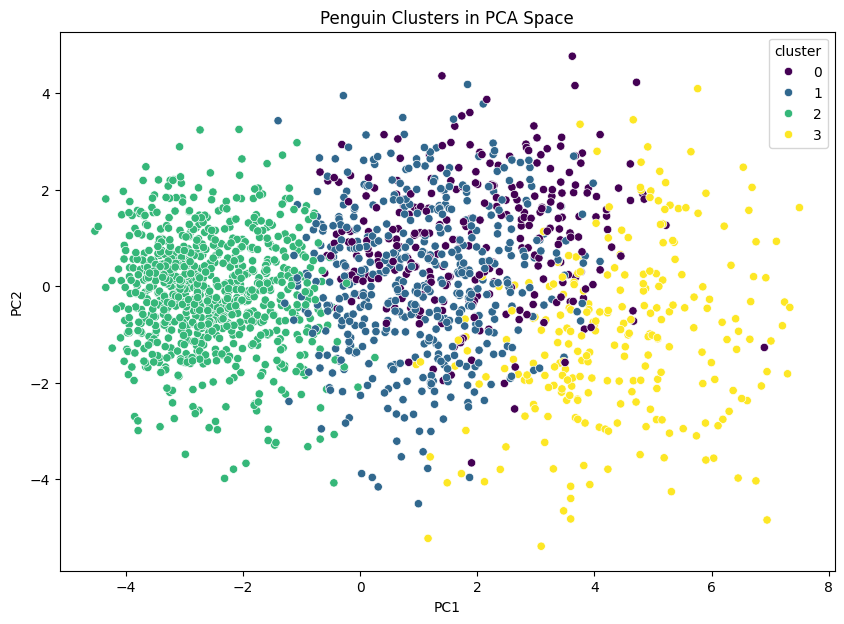

In [87]:
#Clean PCA Plot
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Penguin Clusters in PCA Space')
plt.show()